### 320K LinkedIn App Google Store Reviews

Google Store Reviews of LinkedIn application


link to the dataset: https://www.kaggle.com/datasets/bwandowando/320k-linkedin-app-google-store-reviews

The dataset encompasses various parameters deemed significant in the context of writing reviews. The included parameters are:

- `review_id`
- `pseudo_author_id`
- `author_name`
- `review_text`
- `review_rating`
- `review_likes`
- `author_app_version`
- `review_timestamp`

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import wordnet
import plotly.express as px


import nltk   # if not installed yet run pip3 install nltk
nltk.download('wordnet')

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

linkedin_df = pd.read_csv('LINKEDIN_REVIEWS.csv')
linkedin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/viktoryia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,Well designed app. It's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52
1,1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,Cool!,5,1,1.0.0,2011-04-07 15:59:50
2,2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,Great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02
3,3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,Great app,5,1,1.0.0,2011-04-07 16:22:27
4,4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,Finally! Would love a Homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58


In [48]:

print(linkedin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322641 entries, 0 to 322640
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          322641 non-null  int64 
 1   review_id           322641 non-null  object
 2   pseudo_author_id    322641 non-null  object
 3   author_name         322641 non-null  object
 4   review_text         320964 non-null  object
 5   review_rating       322641 non-null  int64 
 6   review_likes        322641 non-null  int64 
 7   author_app_version  255635 non-null  object
 8   review_timestamp    322641 non-null  object
dtypes: int64(3), object(6)
memory usage: 22.2+ MB
None


**Note:** Notably, the dataset lacks empty cells, and all values are represented by either int64 or object

**Note:** While analyzing the dataset, I noticed a column that serves no purpose in the data processing. So I have deleted it with the help of drop function and also checked the dataset for having missing values.

In [49]:
linkedin_df = linkedin_df.drop(['Unnamed: 0'], axis=1)
linkedin_df.isnull().sum()


review_id                 0
pseudo_author_id          0
author_name               0
review_text            1677
review_rating             0
review_likes              0
author_app_version    67006
review_timestamp          0
dtype: int64

**Note:** While inspecting for missing values, I found that the `review_text` and `author_app_version` fields contain some missing values. Fortunately, in our case, this does not impact the sentiment analysis.

In [50]:

duplicates = linkedin_df.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
322636    False
322637    False
322638    False
322639    False
322640    False
Length: 322641, dtype: bool


**Note:** While analyzing the dataset, I also examined whether there are any duplicates, as they can potentially influence the results.

In [51]:
linkedin_df['review_text'] = linkedin_df['review_text'].str.lower()
linkedin_df

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,cd2c2a2c-750b-435c-823c-277a6dbcef2a,152618553977019693742,A Google user,well designed app. it's much easier to use tha...,5,0,1.0.3,2011-04-07 15:57:52
1,ac8d5093-31ce-4f12-8c6b-ee79a06295ab,234382942865437071667,A Google user,cool!,5,1,1.0.0,2011-04-07 15:59:50
2,bbae055c-f20b-4c01-b604-7cea72416a3a,174473604608358796368,A Google user,great to finally see this on the market!,5,0,2.0.5,2011-04-07 16:16:02
3,38a13596-b208-423d-8d96-3199e1993138,286593453219054880269,A Google user,great app,5,1,1.0.0,2011-04-07 16:22:27
4,9ddd29ce-b137-4286-9aa1-3bbdd0015e0a,167276875678680630145,A Google user,finally! would love a homeycomb specific versi...,4,0,1.0.0,2011-04-07 17:41:58
...,...,...,...,...,...,...,...,...
322636,171c29e4-f949-4184-a855-088601940556,275678628651535885903,Di***********gh,better experience,5,0,4.1.884,2023-11-18 03:28:03
322637,60bb1c67-895f-4cd9-8dcd-75e265964304,133930640114614566822,Da*******rd,great networking app!,5,0,4.1.884,2023-11-18 03:28:03
322638,aacd49a4-d8ab-412b-b524-3b4e08c9cbcb,128371033984564098315,Si***********li,for the love of god! please activate your cust...,2,0,4.1.884,2023-11-18 03:42:56
322639,b2af83e8-5ee5-43b0-98ca-1cdc975b0780,236018248827476569871,Ju***************ez,excepcional,5,0,4.1.881,2023-11-18 03:59:58


**Note:** Lowercasing text is done for consistency and normalization. It ensures that words with different capitalizations are treated the same, simplifying analysis tasks like word frequency, text matching, and tokenization. Additionally, it aids model generalization and improves the accuracy of certain analyses.

## Exercise 1 (data preparation)
a) Remove punctuation from reviews using the given function.   
b) Replace all missing (nan) revies with empty "" string.  
c) Drop all the entries with rating = 3, as they have neutral sentiment.   
d) Set all positive ($\geq$4) ratings to 1 and negative($\leq$2) to -1.

In [52]:

linkedin_df['review_text'] = linkedin_df['review_text'].astype(str)
linkedin_df['review_text'] = linkedin_df['review_text'].apply(remove_punctuation)
#short test: 
linkedin_df["review_text"][25] == 'for a brand new app this is awesome i would recommend the addition of profile editing in future releases otherwise this is a perfect mobile app'
remove_punctuation(linkedin_df["review_text"][25]) == 'for a brand new app this is awesome i would recommend the addition of profile editing in future releases otherwise this is a perfect mobile app'

True

**Notes:**  I have clarified that the `review_text` column exclusively holds string values. Using the `apply` function, I've successfully eliminated all punctuation. This process aids in eliminating noise from our data, preventing situations where `word.` and `word` would be treated as distinct words. Generally, punctuation doesn't contribute significantly to the model (it's worth noting that the function responsible for punctuation removal also excludes exclamation points).

In [53]:

linkedin_df['review_text'].replace(np.nan, "", inplace=True)

linkedin_df["review_text"][2] == linkedin_df["review_text"][2]

True

**Notes:** The `np.nan` is a constant representing a missing or undefined numerical value in a NumPy array. It stands for not a number and has a float type. It was removed using replace function. Since CountVectorizer cannot process `nan` values, it was necessary to replace them with empty strings.

In [54]:

def has_synset(word):
    synsets = wordnet.synsets(word)
    return len(synsets) > 0


def filter_reviews(row):
    words_in_review = row['review_text'].split()
    return any(has_synset(word) for word in words_in_review)


linkedin_df = linkedin_df[linkedin_df.apply(filter_reviews, axis=1)]


**Notes:** While analyzing the dataset, I conducted research and discovered that some review texts lack meaningful content. To address this, I employed Natural Language Processing (NLP) analysis using nltk library. Using synsets, I evaluated the words in the review text field and applied a filtering function to eliminate non-meaningful reviews, subsequently deleting the corresponding rows.

In [55]:
fig=px.pie(linkedin_df, values=linkedin_df['review_rating'].value_counts().values,
           names=linkedin_df['review_rating'].value_counts().index, title='review_rating')
fig.show()

**Note:** I examined whether there is a need to eliminate neutral reviews(if any) and considered whether it is necessary to categorize comments strictly as negative or positive. To assess this, I created a pie chart. Upon analysis, I concluded that following the steps outlined in the basic assignment is essential.

In [56]:

linkedin_df = linkedin_df[linkedin_df["review_rating"] != 3]

print(sum(linkedin_df["review_rating"] == 3))

0


**Notes:** In the provided code, I removed all entries with a rating of 3 and subsequently verified whether the removal was successful.

In [57]:
#d)

linkedin_df["review_rating"] = np.where(linkedin_df["review_rating"] >= 4, 1, np.where(linkedin_df["review_rating"] <= 2, -1, linkedin_df["review_rating"]))

# Test if all ratings are now either 1 or -1
#short test:
sum(linkedin_df["review_rating"]**2 != 1)

0

**Notes:** Then I have set all positive (greater or equal to 4) ratings to 1 and negative(less or equal to 2) to -1.

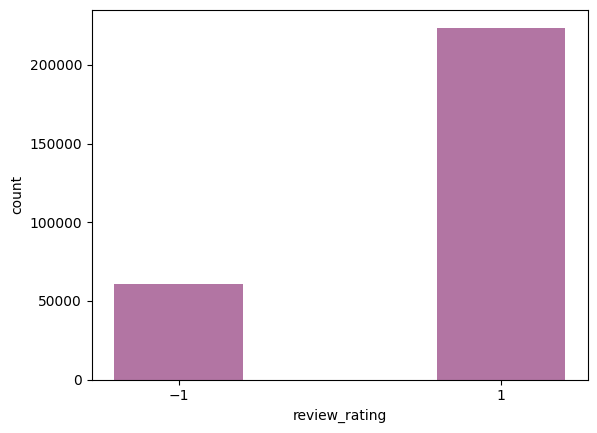

In [58]:
color = (0.5,
         0.1, 
         0.4, 
         0.6 
         ) 

rating_counts = linkedin_df['review_rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values, color=color)
plt.xlabel('review_rating')
plt.xticks([-1, 1])
plt.ylabel('count')
plt.title('')
plt.show()

**Notes:** After categorizing the reviews into strictly positive or negative, I became curious about the proportions between negative and positive comments. In the provided bar plot we can see that the number of positive reviews is much bigger than the number of negative reviews.

## Exercise 2 
a) Split dataset into training and test sets.     
b) Transform reviews into vectors using CountVectorizer. 

In [59]:
#a)
train, test = train_test_split(linkedin_df, train_size=0.8, test_size=0.2, random_state=9)

**Notes:** In the provided code I have splitted the dataset into train (80% of the dataset) and test (20% of the dataset) sets. To achieve this, I'm utilizing the `train_test_split` function. I've also defined a random state. The random state value maintains dataset consistency, producing the same dataset for a given integer value.

In [60]:
#b)
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(list(train["review_text"]))
y = train["review_rating"]
X_test = vectorizer.transform(list(test["review_text"]))
y_test = test["review_rating"]


**Notes:** the code I've provided is using the CountVectorizer from scikit-learn to convert a collection of text documents into a matrix of token counts. The `fit_transform` method is used to convert the training reviews in the `review_text` column of the train dataframe into a sparse matrix (X) of token counts. It both fits the vectorizer on the training data and transforms the data simultaneously. The numbers stored in this vector represent the frequency of each word in the given review.

## Exercise 3 
a) Train LogisticRegression model on training data (reviews processed with CountVectorizer, ratings as they were).   
b) Print 10 most positive and 10 most negative words.

In [61]:
#a)
model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.927231491411593


/home/viktoryia/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Notes:** I have constructed the model to identify positive and negative words. A rating of -1 signifies a predominantly negative sentiment in the review, while a rating of 1 indicates the opposite. 

The `fit` method trains the model using logistic regression to fit the appropriate regression curve. It takes an array of features as parameters and an array representing the response to these features.

The `accuracy_score` function from the sklearn.metrics package computes the accuracy score, which measures the accuracy of a set of predicted labels compared to the true labels.

In [62]:
#b)

feature_names = np.array(vectorizer.get_feature_names_out())

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Create a dictionary mapping feature names to coefficients
features_coefficients = dict(zip(feature_names, coefficients))

print("10 Most Positive Words:")
print(sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)[:10])

print("\n10 Most Negative Words:")
print(sorted(features_coefficients.items(), key=lambda x: x[1])[:10])

10 Most Positive Words:
[('outstanding', 3.727427917789589), ('excellent', 3.705309678847864), ('awesome', 3.280181093146754), ('great', 2.7401734398292916), ('fantastic', 2.7389392799984735), ('wonderful', 2.7151033007675576), ('incredible', 2.614273451080361), ('amazing', 2.5889359250887343), ('superb', 2.546601521115095), ('helpfull', 2.5243109663325227)]

10 Most Negative Words:
[('pathetic', -4.654068424120996), ('worst', -3.8730100535987377), ('rubbish', -3.860689496848824), ('poor', -3.5918170573519492), ('worthless', -3.4503726731536597), ('lousy', -3.3789918333908386), ('sucks', -3.3663289122558475), ('bloatware', -3.2924321897071156), ('useless', -3.219676480176192), ('censorship', -3.205281431013104)]


**Note:** The provided code is analyzing the coefficients of a trained logistic regression model and identifying the words that have the most positive or negative impact on the model's predictions. `vectorizer.get_feature_names_out()` returns the feature names used by the CountVectorizer. `np.array()` is used to convert the result into a numpy array. `zip` is used to pair each feature name with its corresponding coefficient, `dict()` - to create a dictionary mapping feature names to their coefficients.


The resulting dictionary `features_coefficients` provides a convenient way to look up the coefficient of each word.


The code prints the 10 words with the highest positive coefficients and the 10 words with the lowest (most negative) coefficients. The sorting is based on the absolute values of the coefficients, with the key=lambda x: x[1] specifying that the sorting should be done based on the coefficients.

## Exercise 4 
a) Predict the sentiment of test data reviews.   
b) Predict the sentiment of test data reviews in terms of probability.   
c) Find five most positive and most negative reviews.   
d) Calculate the accuracy of predictions.

In [63]:
y_pred = model.predict(X_test)


for i in range(5):
    print("Review:", test["review_text"].iloc[i])
    print("Actual Rating:", y_test.iloc[i])
    print("Predicted Sentiment:", y_pred[i])
    print()

Review: fantastic
Actual Rating: 1
Predicted Sentiment: 1

Review: i like linkedin
Actual Rating: 1
Predicted Sentiment: 1

Review: excellent
Actual Rating: 1
Predicted Sentiment: 1

Review: since february 19 update this app is not working lame maybe test before releasing eh everytime be there is an update must uninstall reinstall also no way to reorder certifications which is disappointing
Actual Rating: -1
Predicted Sentiment: -1

Review: why r u creating site like facebook keep it simple
Actual Rating: -1
Predicted Sentiment: 1



**Note:** The output of this code provides a quick comparison between the actual sentiment (ratings) and the sentiment predicted by the logistic regression model for the first few reviews in the test set. It helps you assess how well the model is performing on real-world data.

In [64]:
y_proba = model.predict_proba(X_test)


for i in range(5):
    print("Review:", test["review_text"].iloc[i])
    print("Actual Rating:", y_test.iloc[i])
    print("Predicted Probabilities:", y_proba[i])
    print()


Review: fantastic
Actual Rating: 1
Predicted Probabilities: [0.01529835 0.98470165]

Review: i like linkedin
Actual Rating: 1
Predicted Probabilities: [0.10024685 0.89975315]

Review: excellent
Actual Rating: 1
Predicted Probabilities: [0.00587613 0.99412387]

Review: since february 19 update this app is not working lame maybe test before releasing eh everytime be there is an update must uninstall reinstall also no way to reorder certifications which is disappointing
Actual Rating: -1
Predicted Probabilities: [9.99983896e-01 1.61037447e-05]

Review: why r u creating site like facebook keep it simple
Actual Rating: -1
Predicted Probabilities: [0.17689349 0.82310651]



**Notes:** The output of this code will show the predicted probabilities for both classes (negative and positive) for each review. This information can be useful for understanding the model's confidence in its predictions.

In [65]:
most_positive_indices = np.argsort(y_proba[:, 1])[::-1][:5]

print("Five Most Positive Reviews:")
for index in most_positive_indices:
    print("Predicted Probability (Positive):", y_proba[index, 1])
    print("Actual Rating:", y_test.iloc[index])
    print("Review:", test["review_text"].iloc[index])
    print()

Five Most Positive Reviews:
Predicted Probability (Positive): 0.9999999999988081
Actual Rating: 1
Review: just like the app and work for my church first baptist church job 2 days aweek tuesday and thursday my job is great i love the work and just working now keep s me busy and actually happy my days now since march to july 5 months now asowme and my job is very good 😊 and actually great and my job is janitorial services im a great work er and actually happy with my job and im busy and on time 📱👱‍♀️ schedule to go out and actually have a great work days very good 😊 and wonderful special family

Predicted Probability (Positive): 0.999999999998396
Actual Rating: 1
Review: dear team yo have created an awesome appit helps us to create our professional resumes and showcase our talents as well as certificationsalso it helps us to connect a lot of professionals around the worldthe best thing is to get connected and also find jobs that matches your skillsetconnect the employers in a professiona

**Note:** The code identifies 5 reviews with the highest predicted probabilities for being positive and prints relevant information about these reviews. 
- `np.argsort(y_proba[:, 1])` returns the indices that would sort the predicted probabilities for the positive class in ascending order.
- `[::-1]` reverses the order, so it becomes descending.
- `[:5]` selects the first 5 indices, corresponding to 5 reviews with the highest predicted probabilities for being positive.

In [66]:

most_negative_indices = np.argsort(y_proba[:, 0])[::-1][:5]


print("Five Most Negative Reviews:")
for index in most_negative_indices:
    print("Predicted Probability (Negative):", y_proba[index, 0])
    print("Actual Rating:", y_test.iloc[index])
    print("Review:", test["review_text"].iloc[index])
    print()

Five Most Negative Reviews:
Predicted Probability (Negative): 1.0
Actual Rating: -1
Review: very slow services by linked in managementin email response is too latehow i give rating 2 star either 5 star kindly look my account which is not working from last 1 week my work is disturbingkindly facilitate me asap regard worst app worst management worst management worst app worst app worst app worst app zero rating zero rating zero rating zero rating thomas attitude is worst

Predicted Probability (Negative): 1.0
Actual Rating: -1
Review: used to be great now is just a mine of untailored content and agencies who are too young to read  if i wanted to be mailed daily by people who are blanket sending mails to anyone with eyes i would rejoin yahoo  the app constantly signs out yet still works when signed out  its clearly not secure and doesnt correctly install over old versions the sign in security will ask me if im a bot even if i get the password wrong meaning i spent 40 seconds looking at 8 

**Note:** Here I have done something simular to the previous lines of code, but to identify the 5 most negative reviews.

In [67]:
#d) 
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.927231491411593


**Note:** With the help of `accuracy_score` I have calculated the accuracy of prediction. The result value of 0.927231491411593 signifies a remarkably high level of accuracy in our predictions, underscoring the effectiveness of our well-trained model in making highly accurate predictions.

## Exercise 5
In this exercise we will limit the dictionary of CountVectorizer to the set of significant words, defined below.


a) Redo exercises 2-5 using limited dictionary.   
b) Check the impact of all the words from the dictionary.   
c) Compare accuracy of predictions and the time of evaluation.

In [68]:
significant_words = ['love','great','easy','management','linkedin','perfect','loves','well','able','work','contact','less','even','waste','disappointed','company','product','money','would','recommend', 'deleted']

In [69]:

vectorizer_limited = CountVectorizer(vocabulary=significant_words)

X_limited = vectorizer_limited.fit_transform(list(train["review_text"]))
y_limited = train["review_rating"]
X_test_limited = vectorizer_limited.transform(list(test["review_text"]))
y_test_limited = test["review_rating"]

In [70]:

model_lim = LogisticRegression()

model_lim.fit(X_limited, y_limited)

y_pred_lim = model_lim.predict(X_test_limited)
accuracy = accuracy_score(y_test_limited, y_pred_lim)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8089453049455863


In [71]:
feature_names_lim = np.array(vectorizer_limited.get_feature_names_out())

# Get the coefficients from the trained model
coefficients_lim = model_lim.coef_[0]

# Create a dictionary mapping feature names to coefficients
features_coefficients_lim = dict(zip(feature_names_lim, coefficients_lim))

print("10 Most Positive Words:")
print(sorted(features_coefficients_lim.items(), key=lambda x: x[1], reverse=True)[:10])

print("\n10 Most Negative Words:")
print(sorted(features_coefficients_lim.items(), key=lambda x: x[1])[:10])

10 Most Positive Words:
[('great', 2.3445475605117148), ('perfect', 2.1841438898288796), ('love', 2.109921915946551), ('easy', 1.5634405112046428), ('recommend', 0.4929055726033177), ('well', 0.4257869279318746), ('loves', 0.347286987640015), ('management', 0.23001000215404974), ('product', -0.41410772553628267), ('linkedin', -0.7026194834942194)]

10 Most Negative Words:
[('waste', -3.796331562297214), ('disappointed', -3.135725324555016), ('deleted', -3.1326049000255356), ('even', -2.6123566476612172), ('able', -1.693558255106843), ('money', -1.6716650611681925), ('less', -1.2421316557592055), ('contact', -1.1704930579143789), ('work', -0.925185850231809), ('would', -0.8678048824022929)]


In [72]:
y_pred_lim = model_lim.predict(X_test_limited)

# Print the predicted sentiment for the first few reviews
for i in range(5):
    print("Review:", test["review_text"].iloc[i])
    print("Actual Rating:", y_test_limited.iloc[i])
    print("Predicted Sentiment:", y_pred_lim[i])
    print()


Review: fantastic
Actual Rating: 1
Predicted Sentiment: 1

Review: i like linkedin
Actual Rating: 1
Predicted Sentiment: 1

Review: excellent
Actual Rating: 1
Predicted Sentiment: 1

Review: since february 19 update this app is not working lame maybe test before releasing eh everytime be there is an update must uninstall reinstall also no way to reorder certifications which is disappointing
Actual Rating: -1
Predicted Sentiment: 1

Review: why r u creating site like facebook keep it simple
Actual Rating: -1
Predicted Sentiment: 1



In [73]:
y_proba_lim = model_lim.predict_proba(X_test_limited)


for i in range(5):
    print("Review:", test["review_text"].iloc[i])
    print("Actual Rating:", y_test_limited.iloc[i])
    print("Predicted Probabilities:", y_proba_lim[i])
    print()

Review: fantastic
Actual Rating: 1
Predicted Probabilities: [0.20771438 0.79228562]

Review: i like linkedin
Actual Rating: 1
Predicted Probabilities: [0.34611996 0.65388004]

Review: excellent
Actual Rating: 1
Predicted Probabilities: [0.20771438 0.79228562]

Review: since february 19 update this app is not working lame maybe test before releasing eh everytime be there is an update must uninstall reinstall also no way to reorder certifications which is disappointing
Actual Rating: -1
Predicted Probabilities: [0.20771438 0.79228562]

Review: why r u creating site like facebook keep it simple
Actual Rating: -1
Predicted Probabilities: [0.20771438 0.79228562]



In [75]:

most_positive_indices_lim = np.argsort(y_proba_lim[:, 1])[::-1][:5]

most_negative_indices_lim = np.argsort(y_proba_lim[:, 0])[::-1][:5]

max_negative_index = max(most_negative_indices_lim)
max_positive_index = max(most_positive_indices_lim)
length_y_test_limited = len(y_test_limited)

max_negative_index = min(max_negative_index, length_y_test_limited - 1)
max_positive_index = min(max_positive_index, length_y_test_limited - 1)

print("Adjusted Max Negative Index:", max_negative_index)
print("Adjusted Max Positive Index:", max_positive_index)


print("Five Most Negative Reviews:")
for index in most_negative_indices_lim:
    if index <= max_negative_index:
        print("Predicted Probability (Negative):", y_proba_lim[index, 0])
        print("Actual Rating:", y_test_limited.iloc[index])
        print("Review:", test["review_text"].iloc[index])
        print()

print("Five Most Positive Reviews:")
for index in most_positive_indices_lim:
    if index <= max_positive_index:
        print("Predicted Probability (Positive):", y_proba_lim[index, 1])
        print("Actual Rating:", y_test_limited.iloc[index])
        print("Review:", test["review_text"].iloc[index])
        print()


Adjusted Max Negative Index: 52977
Adjusted Max Positive Index: 50674
Five Most Negative Reviews:
Predicted Probability (Negative): 0.9999949820006349
Actual Rating: -1
Review: used to be great now is just a mine of untailored content and agencies who are too young to read  if i wanted to be mailed daily by people who are blanket sending mails to anyone with eyes i would rejoin yahoo  the app constantly signs out yet still works when signed out  its clearly not secure and doesnt correctly install over old versions the sign in security will ask me if im a bot even if i get the password wrong meaning i spent 40 seconds looking at 8 pages of street signs only to find out the password was wrong anyway  the fact youre turning it into a facebook style experience proves how out of touch you are too late to innovate should be the new moto emails are not sms and cvs are not instergram posts in 2016 i tweeted you would make it laggy ugly and a pain to sign into in 2017 im ready to say goodbye fo

**Note:** While trying to print out top 5 most positive(most negative) reviews I view a problem with indices, to eliminate the problem I check the max indices to make sure that it is not out of range

In [76]:
accuracy_lim = accuracy_score(y_test_limited, y_pred_lim)

# Print the accuracy
print("Accuracy:", accuracy_lim)

Accuracy: 0.8089453049455863


**Note:** With the help of `accuracy_score` I have calculated the accuracy of prediction. The result value of 0.8089453049455863 signifies a remarkably high level of accuracy in our predictions, underscoring the effectiveness of our well-trained model in making highly accurate predictions.

In [77]:

for word, coef in zip(vectorizer_limited.get_feature_names_out(),model_lim.coef_[0]):
    print(f"{word}: {coef}")


love: 2.109921915946551
great: 2.3445475605117148
easy: 1.5634405112046428
management: 0.23001000215404974
linkedin: -0.7026194834942194
perfect: 2.1841438898288796
loves: 0.347286987640015
well: 0.4257869279318746
able: -1.693558255106843
work: -0.925185850231809
contact: -1.1704930579143789
less: -1.2421316557592055
even: -2.6123566476612172
waste: -3.796331562297214
disappointed: -3.135725324555016
company: -0.7856473339844477
product: -0.41410772553628267
money: -1.6716650611681925
would: -0.8678048824022929
recommend: 0.4929055726033177
deleted: -3.1326049000255356


**Note:** This code provides insights into how much each word from the limited dictionary contributes to the logistic regression model's predictions. Positive coefficients indicate a positive impact on the predicted class, while negative coefficients indicate a negative impact.

In [78]:
import sys, time

**Note:** The `%%time` and `%%timeit` are Jupyter notebook magic commands used to measure the execution time of a cell.

- `%%time`: This command provides the total time taken for the execution of the entire cell. It's useful for getting a high-level overview of the time taken by the code within the cell.

    
- `%%timeit`: This command runs the code in the cell multiple times and provides a more detailed analysis, including the average time taken per iteration and the standard deviation. It's useful for obtaining a more precise measurement of the execution time.

In [79]:
%%time
%%timeit
model_lim.predict(X_test_limited)

269 µs ± 5.36 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
CPU times: user 2.18 s, sys: 230 µs, total: 2.18 s
Wall time: 2.18 s


In [80]:
%%time
%%timeit
model.predict(X_test)

863 µs ± 36.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
CPU times: user 7.08 s, sys: 210 µs, total: 7.08 s
Wall time: 7.09 s


In [81]:
print(f"first model score: {model.score(X_test, y_test)}")
print(f"second model score: {model_lim.score(X_test_limited, y_test_limited)}")

first model score: 0.927231491411593
second model score: 0.8089453049455863


**Note:** The code is comparing the scores of two different models on their respective test datasets.


This prints the accuracy scores of the first and second model on the full test dataset using the score method.